# Plot average performances per bloc

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

### Load data

In [27]:
dname = os.getcwd() + '/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts\\data_loading/data_v2_quotes/'

In [28]:
ACCURACY = np.load(dname + 'ACCURACY.npy')
acc_first_prop = np.load(dname + 'Acc_first_prop.npy')
acc_second_prop = np.load(dname + 'acc_second_prop.npy')
acc_third_prop = np.load(dname + 'acc_third_prop.npy')
#BLOC_TYPE = np.load(dname + 'BLOC_TYPE.npy', allow_pickle=True)

In [29]:
n_sujs, n_blocs, n_trials = ACCURACY.shape
ACCURACY.shape

(49, 8, 16)

### Plotting parameters

In [30]:
cmap = matplotlib.cm.get_cmap('Set1')
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

In [31]:
bloc_type_colors = {
    'training': cmap(norm(0)),
    'generalization': cmap(norm(.2))
}

# Figure 1 - Accuracy

Plotting function

In [10]:
# from sqlalchemy import false


def plot_accuracy(subj_means, block_mean, block_se, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Average per bloc
    for i in range(n_blocs):
        ax.errorbar(
            x = i,
            y = block_mean[i],
            yerr = 2 * block_se[i],
            color = cmap(norm(.2)),
            markersize = 5,
            marker = 'D',
            alpha = 1
        )
    # Individual data
    for i in range(n_blocs):
        ax.plot(
            np.ones(n_sujs) * i + np.random.normal(0, 0.05, (n_sujs)), 
            subj_means[:, i],
            color = cmap(norm(.2)),
            markersize = 3,
            marker = 'o',
            alpha = 0.5, 
            lw = 0
        )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    plt.tight_layout()
    fig.savefig(fig_name)
    

### Compute group average

In [32]:
ACCURACY_M_SUJS = np.nanmean(ACCURACY, axis=2)
ACCURACY_M = np.mean(ACCURACY_M_SUJS, axis=0)
ACCURACY_SE = np.std(ACCURACY_M_SUJS, axis=0)/np.sqrt(n_sujs)
ACCURACY_M.shape


(8,)

### Plot

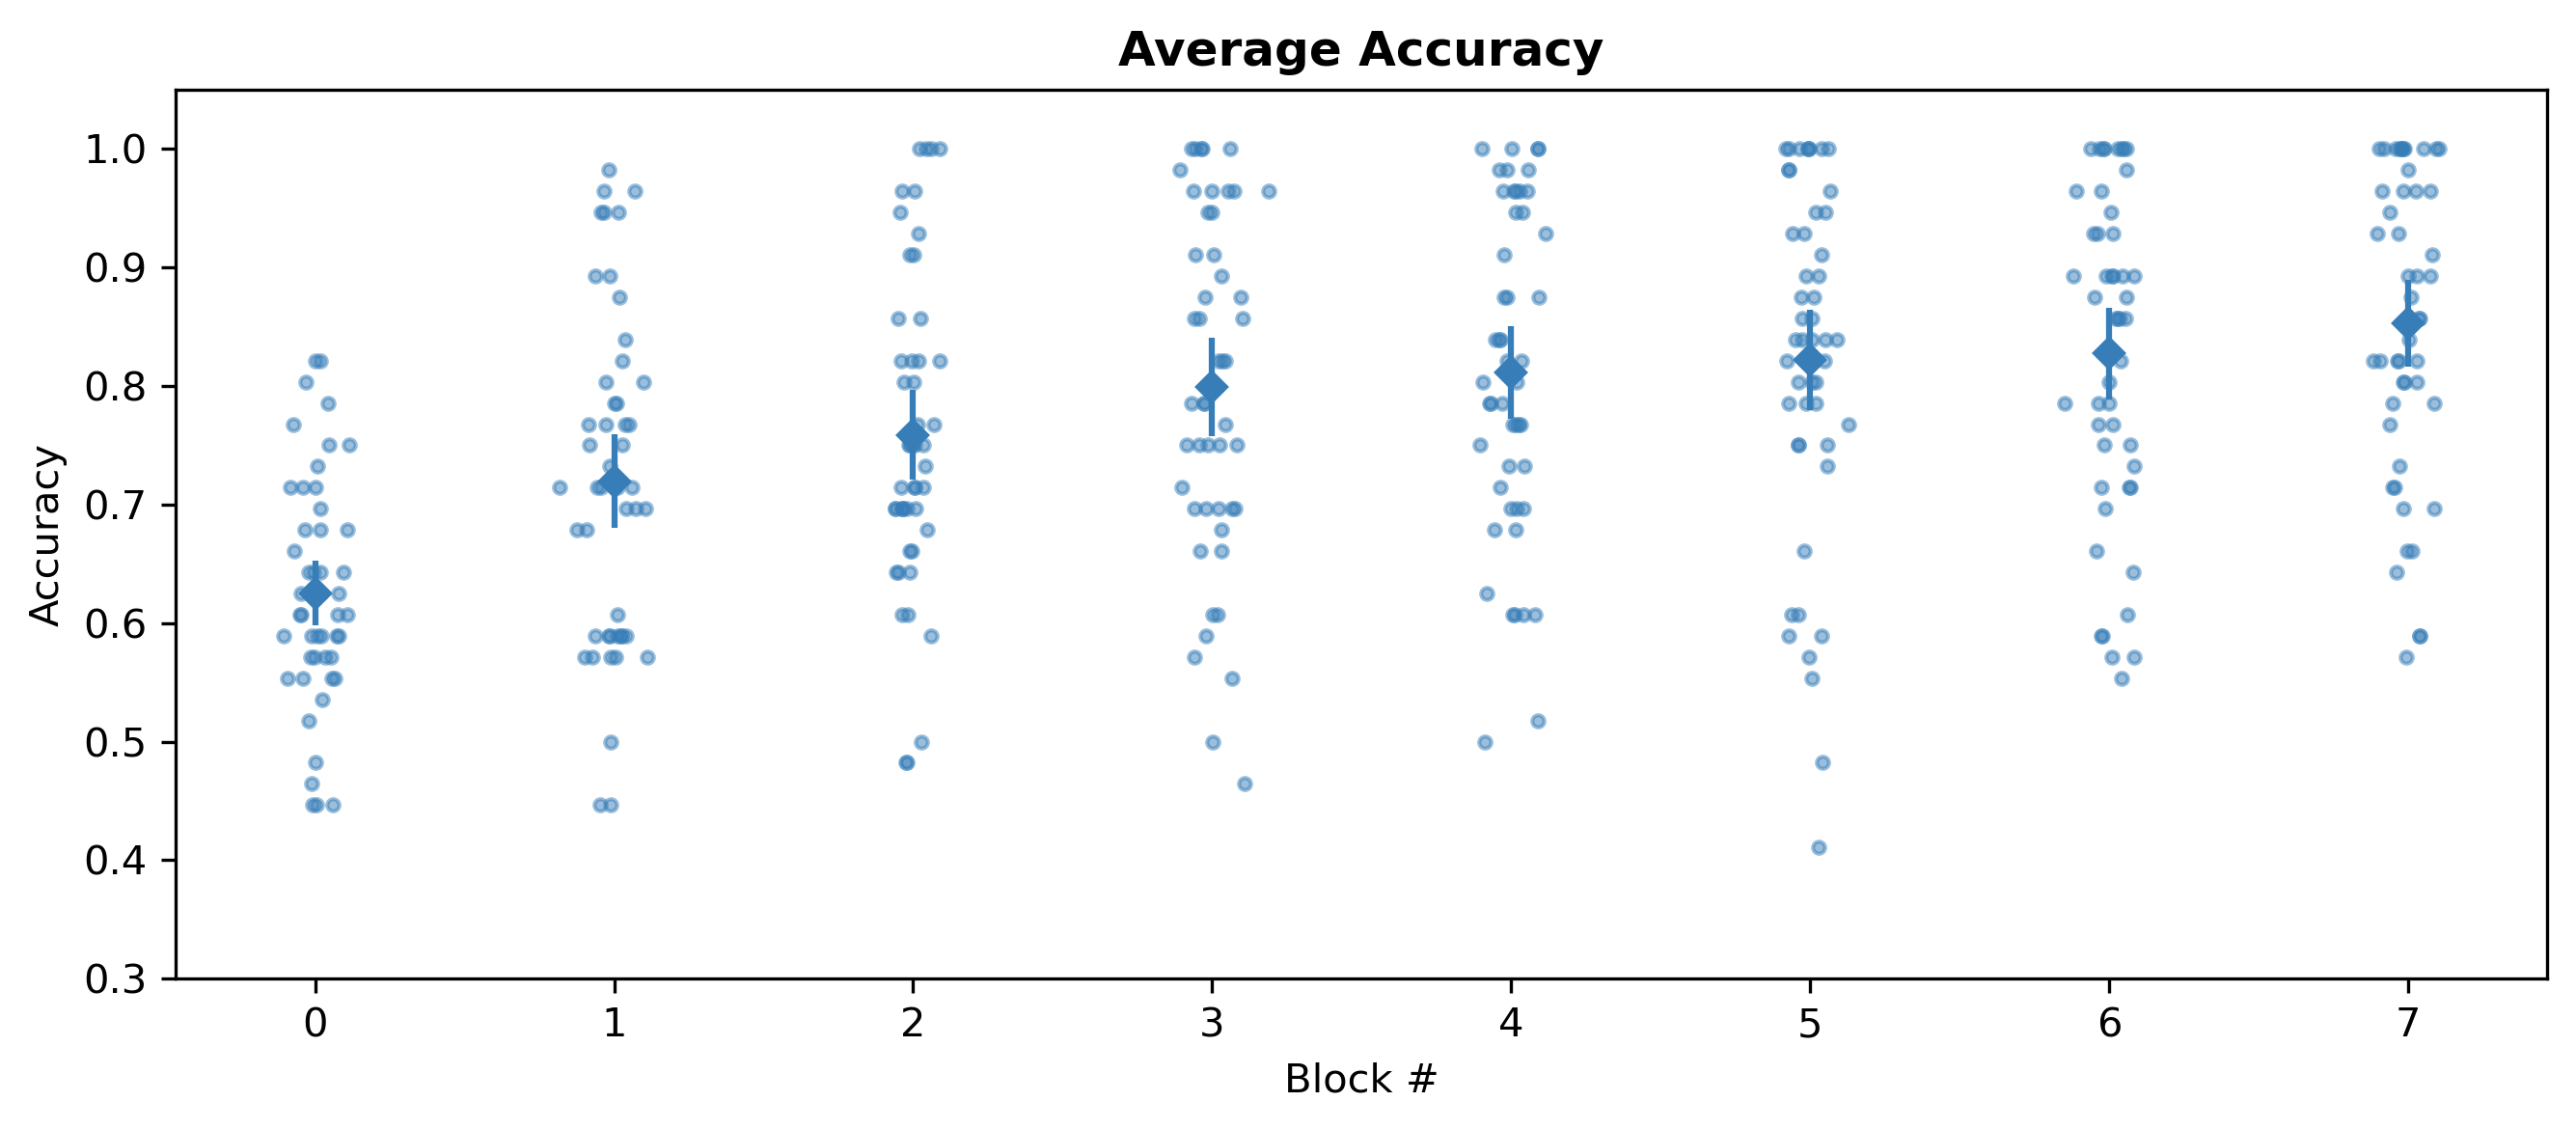

In [33]:

func_name = 'figures_new/fig_1.png'
fig_title = 'Average Accuracy'
# chance_level = 0.4897
plot_accuracy(ACCURACY_M_SUJS, ACCURACY_M, ACCURACY_SE,func_name,fig_title)


Compute the average for the first property

In [34]:
subj_acc_first = np.nanmean(acc_first_prop, axis=2)
mean_acc_first = np.mean(subj_acc_first, axis=0)
se_acc_first = np.std(subj_acc_first, axis=0)/np.sqrt(n_sujs)
mean_acc_first.shape

(8,)

Plot

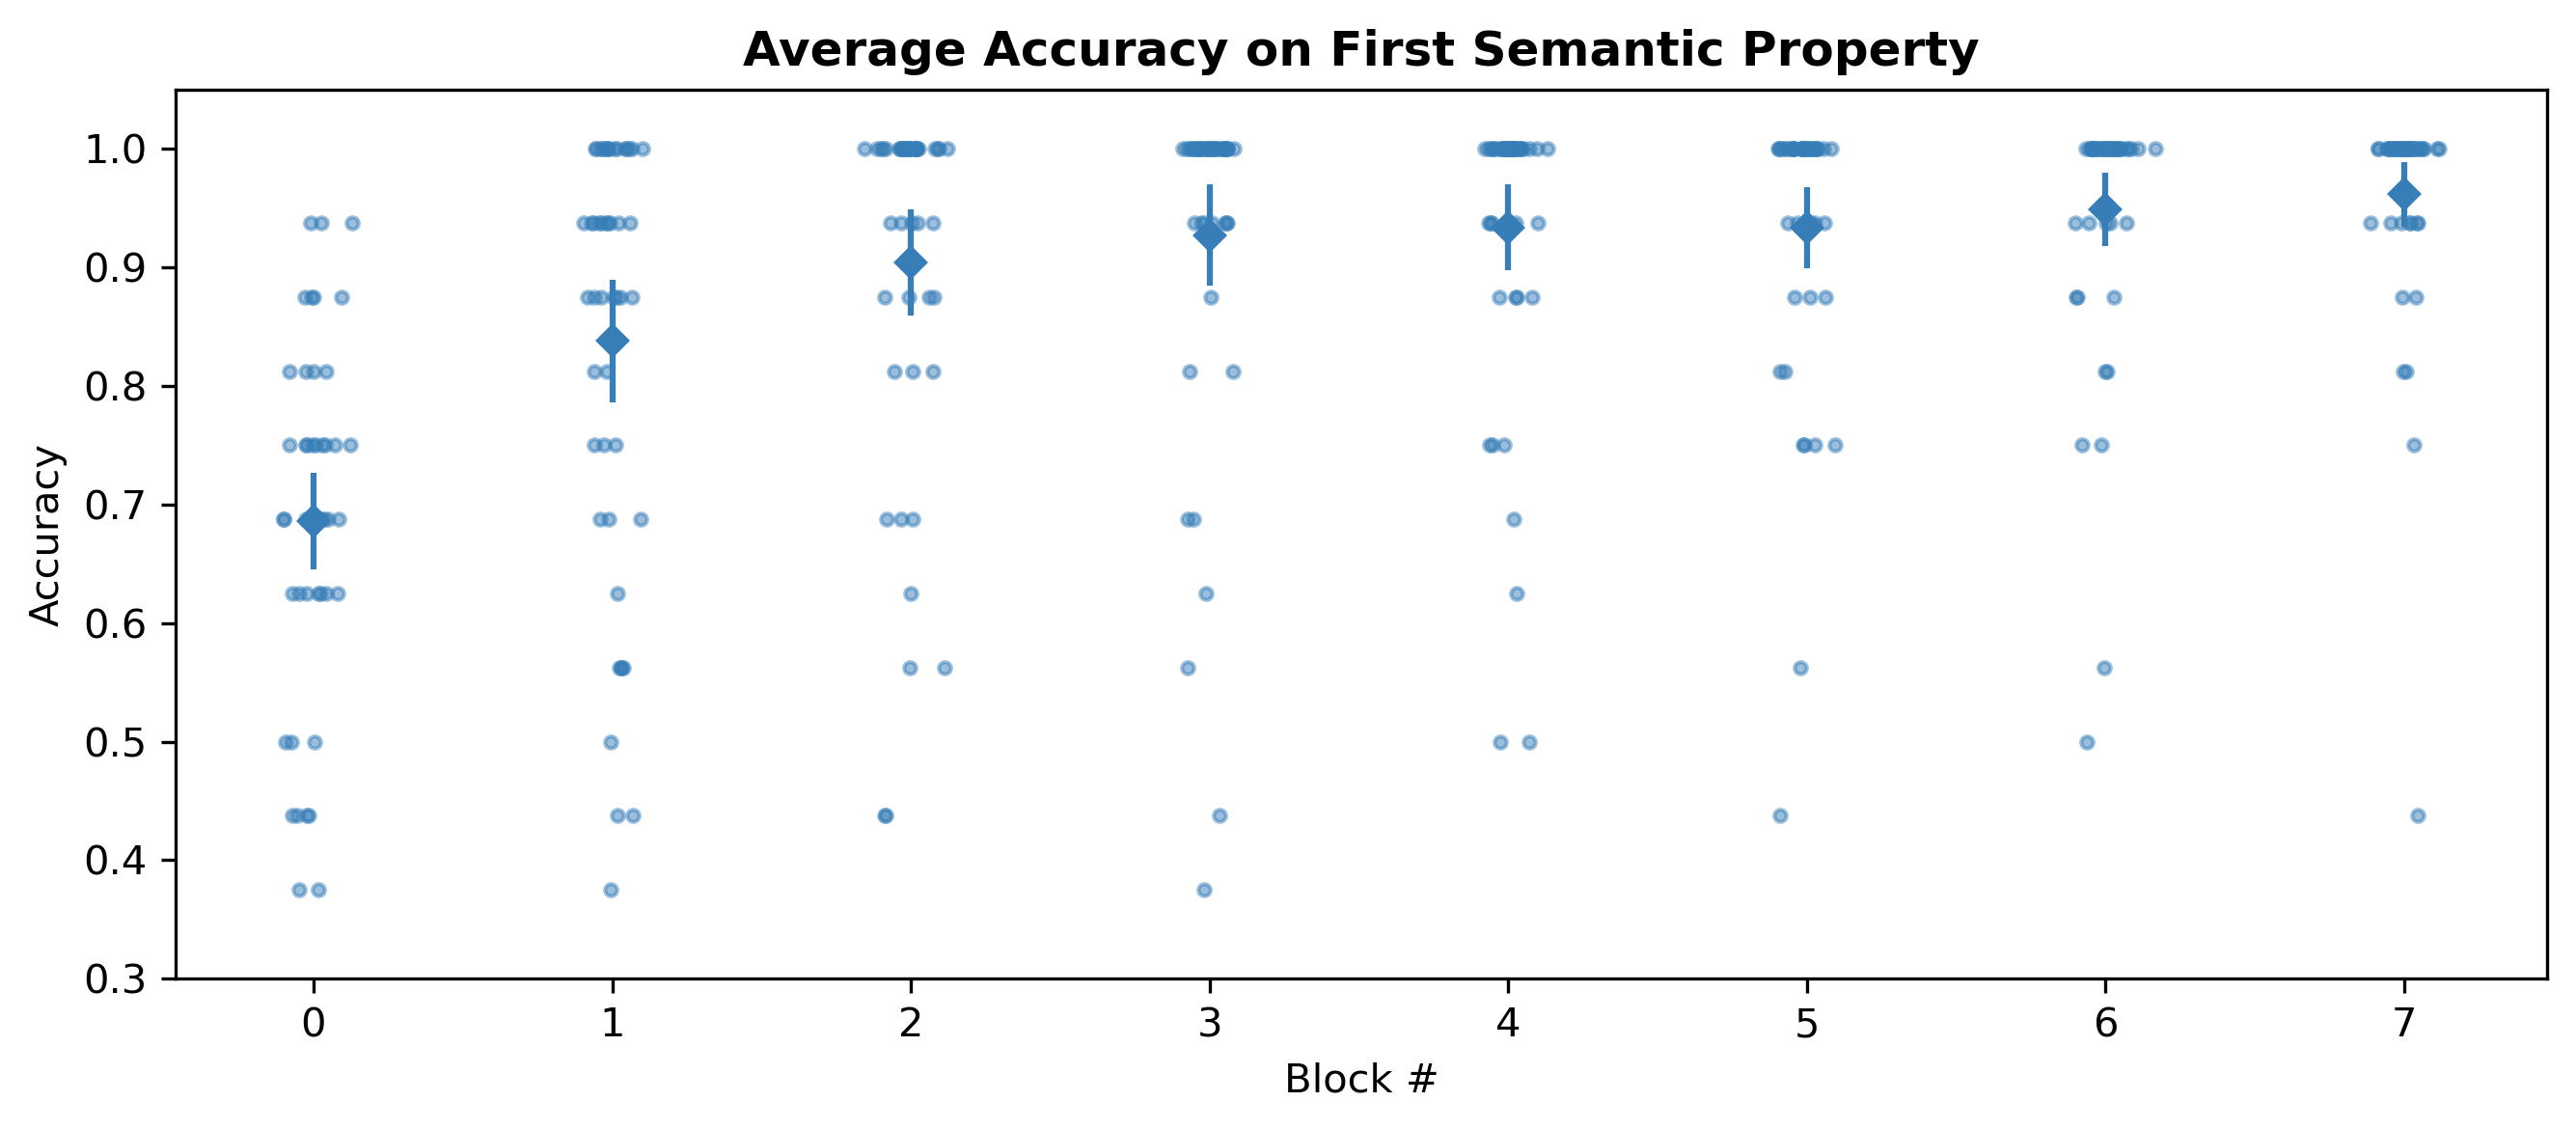

In [35]:
func_name = 'figures_new/fig_2.png'
fig_title = 'Average Accuracy on First Semantic Property'
# chance_level = 0.428
plot_accuracy(subj_acc_first, mean_acc_first, se_acc_first, func_name, fig_title)

Compute average for the second property

In [37]:
subj_acc_second = np.nanmean(acc_second_prop, axis=2)
mean_acc_second = np.mean(subj_acc_second, axis=0)
se_acc_second = np.std(subj_acc_second, axis=0)/np.sqrt(n_sujs)
mean_acc_second.shape

(8,)

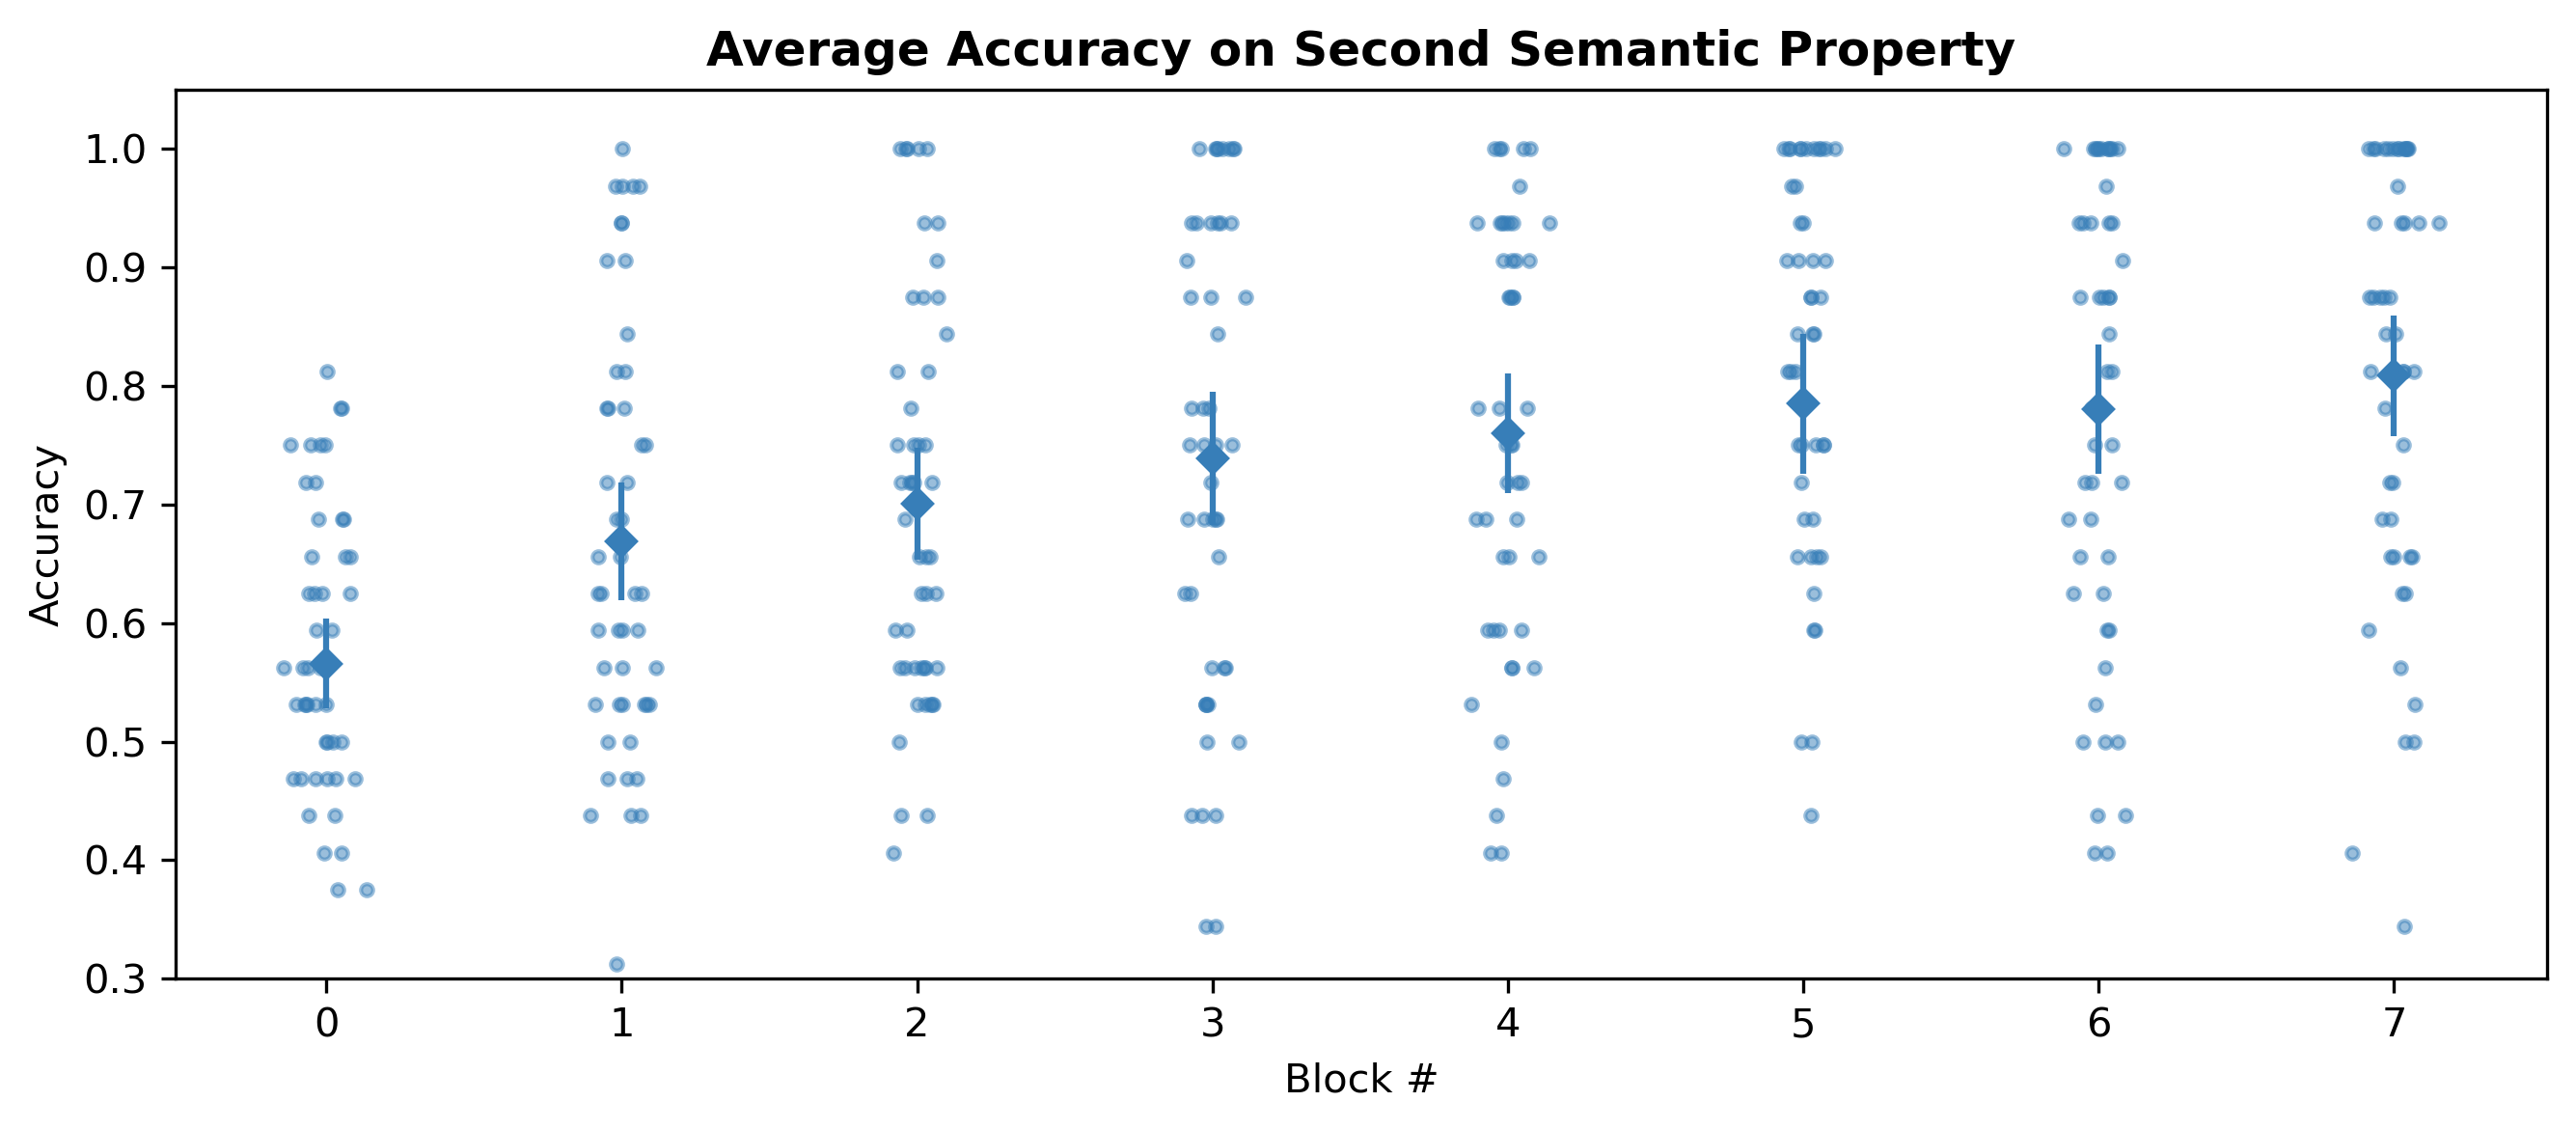

In [38]:
# Define figure
func_name = 'figures_new/fig_3.png'
fig_title = 'Average Accuracy on Second Semantic Property'
# chance_level = 3/7
plot_accuracy(subj_acc_second, mean_acc_second, se_acc_second, func_name, fig_title)

In [39]:
subj_acc_third = np.nanmean(acc_third_prop, axis=2)
mean_acc_third = np.mean(subj_acc_third, axis=0)
se_acc_third = np.std(subj_acc_third, axis=0)/np.sqrt(n_sujs)
mean_acc_third.shape

(8,)

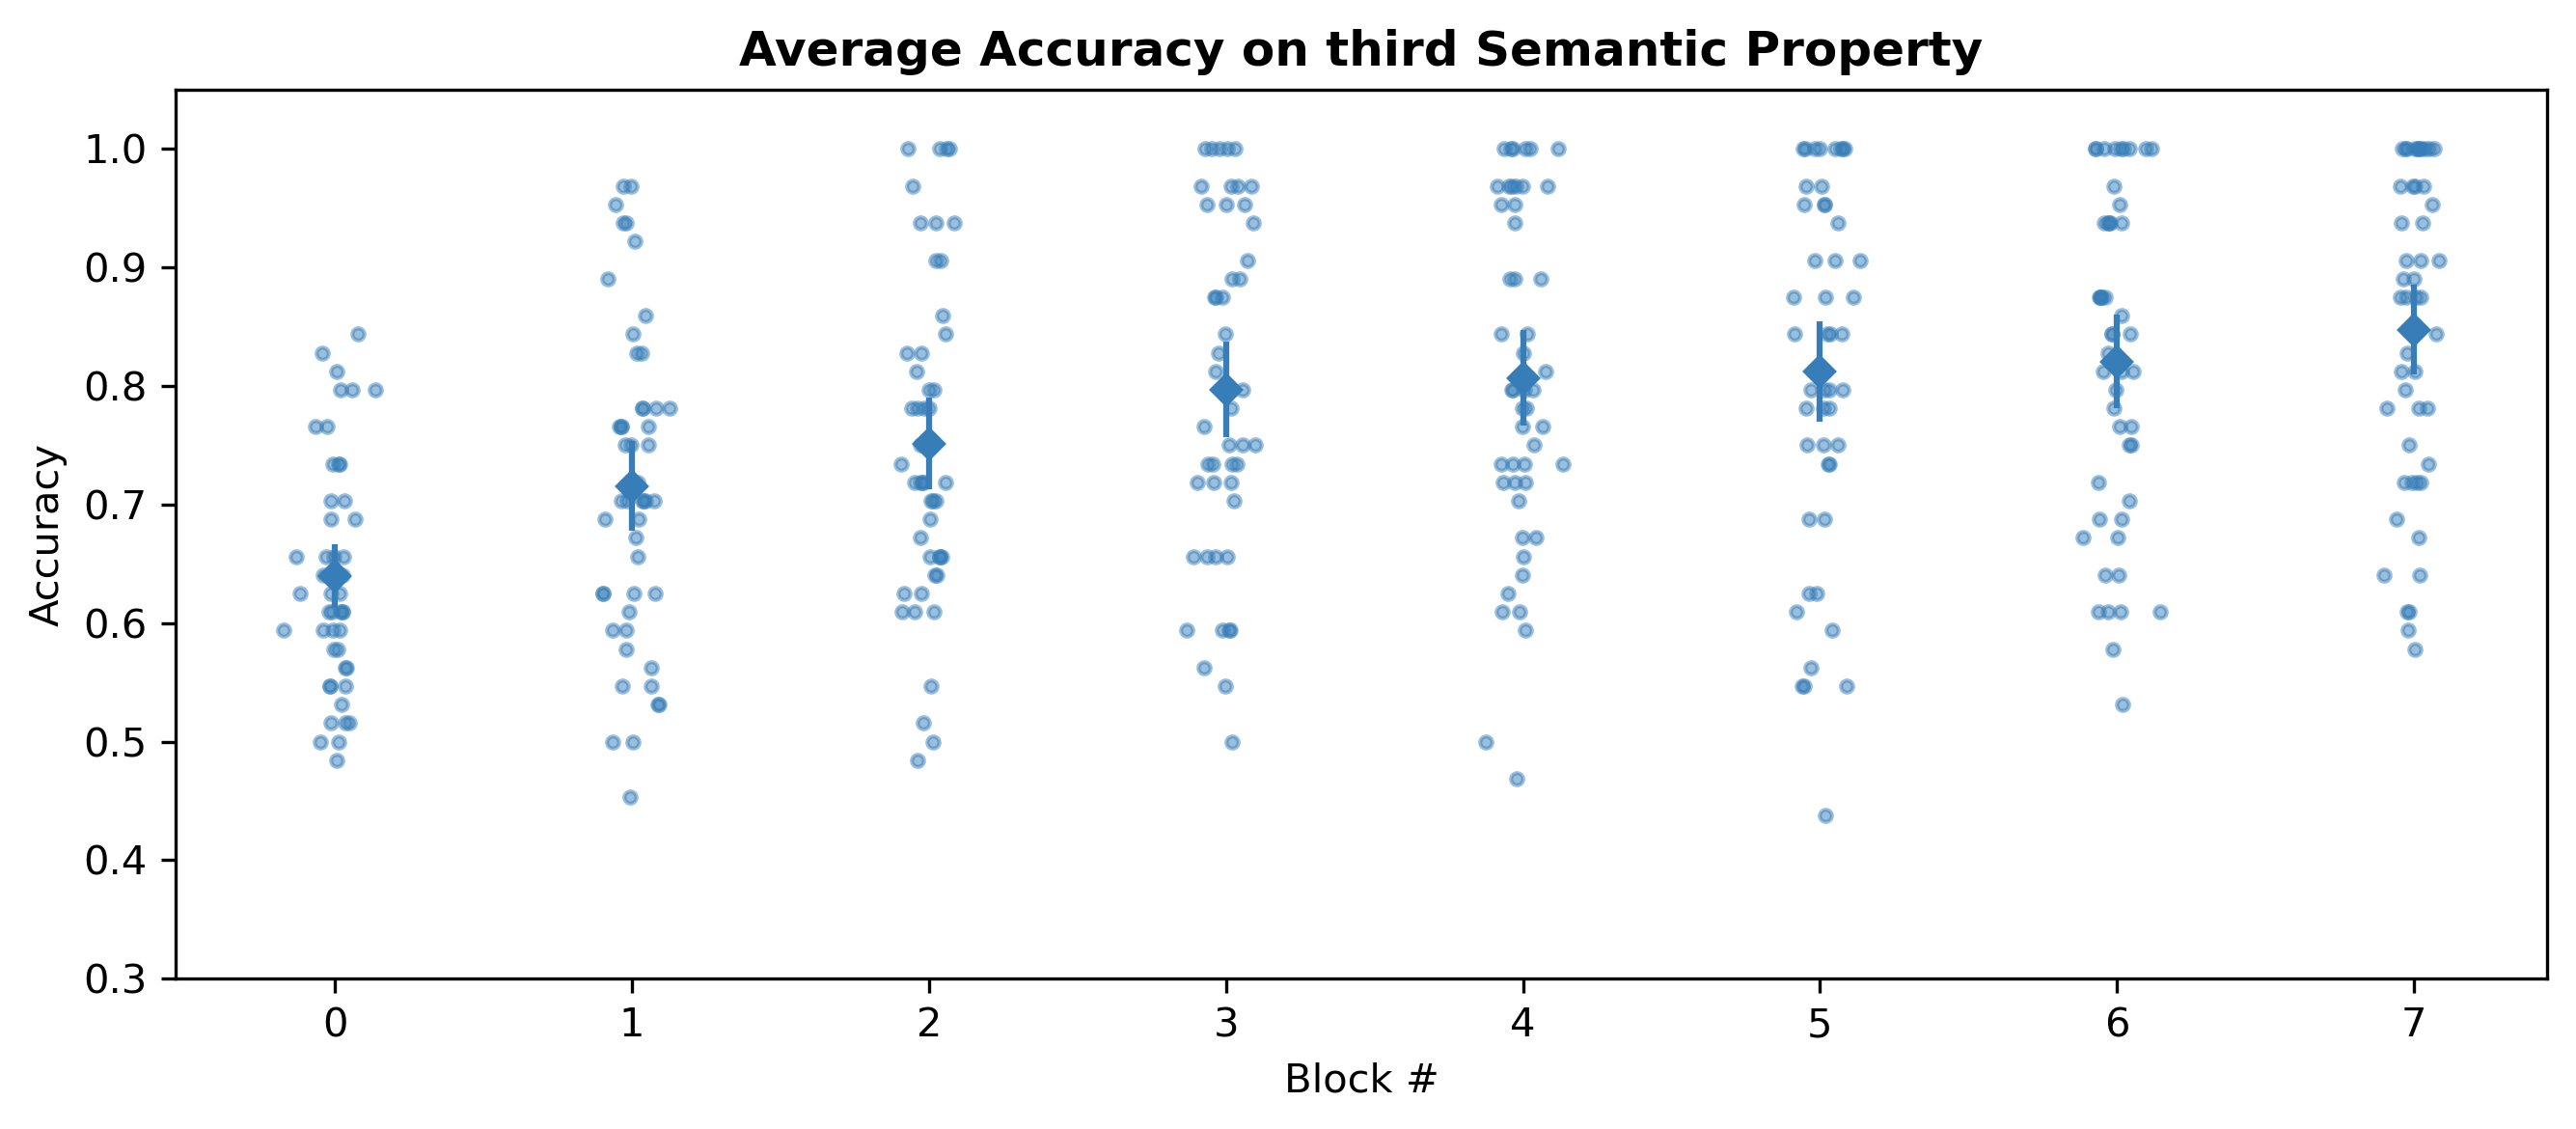

In [40]:
# Define figure
func_name = 'figures_new/fig_4.png'
fig_title = 'Average Accuracy on third Semantic Property'
# chance_level = 3/7
plot_accuracy(subj_acc_third, mean_acc_third, se_acc_third, func_name, fig_title)